# Quick Tutorial on EDA Charts

Resources:
 - https://www.python-graph-gallery.com/
 - https://seaborn.pydata.org/
 - https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes
 - https://seaborn.pydata.org/examples/index.html

In [5]:
import seaborn as sns
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. Distribution Plots
- Dist-Plot
- Joint Plot
- Pair Plot
- Rug Plot
2. Categorical Plots
- Bar Plot
- Count Plot
- Box Plot
- Violin Plot
- Point Plot
3. Advanced Plots
- Strip Plot
- Swarm Plot
4. Matrix Plots
- Heat Map
- Cluster Map
5. Grids
- Facet Grid
6. Regression Plots

## Univariate Analysis

### Continuous Variable

##### Hist plot gives us the histogram of the selected continuous variable.

<AxesSubplot:xlabel='Age', ylabel='Count'>

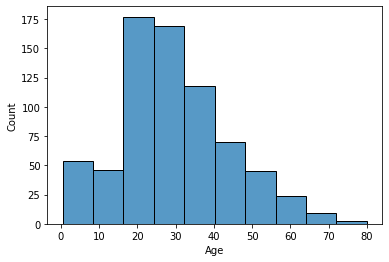

In [44]:
# Histogram
sns.histplot(x = df['Age'], bins = 10)

##### Dist plot gives us the histogram and the density of the selected continuous variable.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

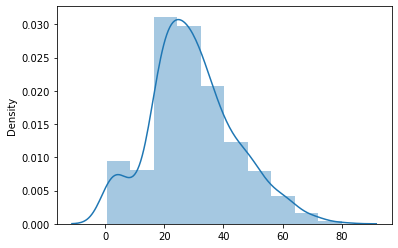

In [45]:
# distribution plot
sns.distplot(x = df['Age'], bins = 10)

<AxesSubplot:xlabel='Age', ylabel='Density'>

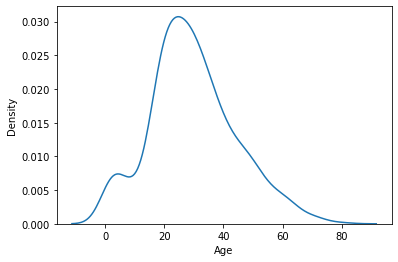

In [47]:
# KDE plot
sns.kdeplot(x = df['Age'])

<AxesSubplot:xlabel='Age'>

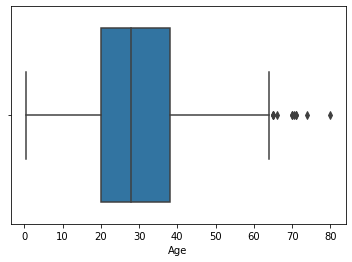

In [48]:
# boxplot
sns.boxplot(x = df['Age'])

##### Rugplot draws a dash mark instead of a uniform distribution as in distplot.

<AxesSubplot:xlabel='Age'>

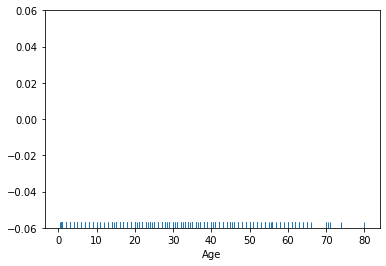

In [73]:
sns.rugplot(x = df['Age'])

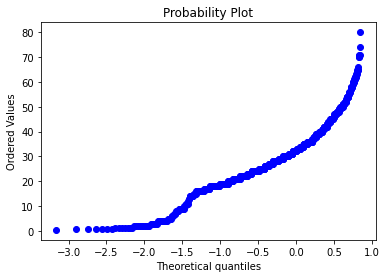

In [65]:
# qqplot
import pylab 
import scipy.stats as stats

stats.probplot(df['Age'], dist="norm", plot=pylab)
pylab.show()

#### Categorical variable
https://seaborn.pydata.org/tutorial/categorical.html

<AxesSubplot:xlabel='Pclass', ylabel='count'>

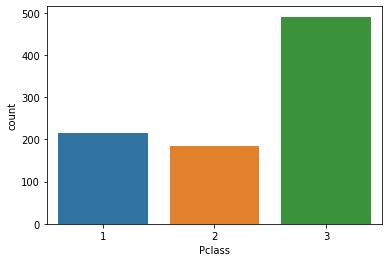

In [69]:
sns.countplot(x= df['Pclass'])

## Bivariate Analysis

### Continuous Vs. Continuous

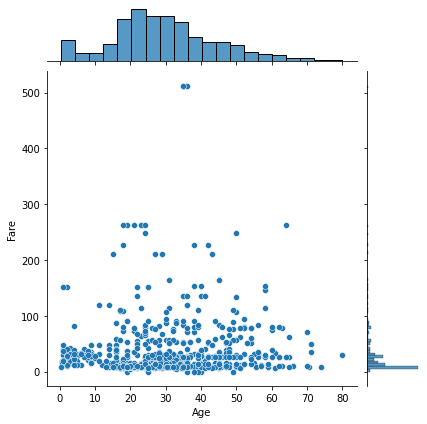

In [11]:
sns.jointplot(x = df['Age'], y = df['Fare'], kind = 'scatter')

#### Continuous Vs. Categorical

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

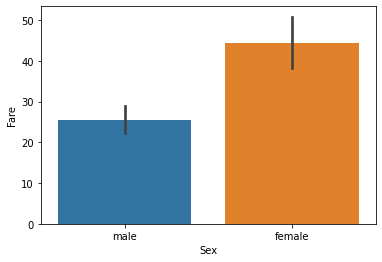

In [74]:
sns.barplot(x = df['Sex'], y = df['Fare'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

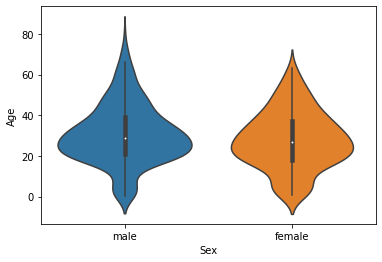

In [75]:
sns.violinplot(y = df['Age'], x = df['Sex'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

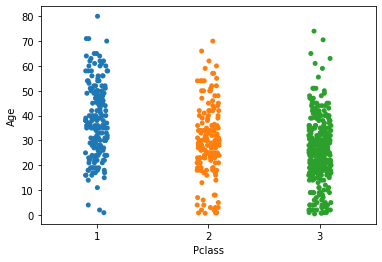

In [76]:
sns.stripplot(y = df['Age'], x = df['Pclass'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

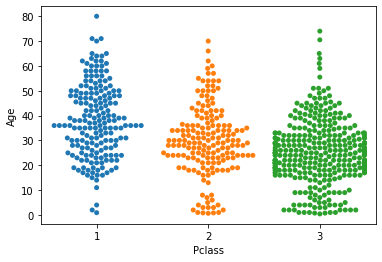

In [77]:
sns.swarmplot(y = df['Age'], x = df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

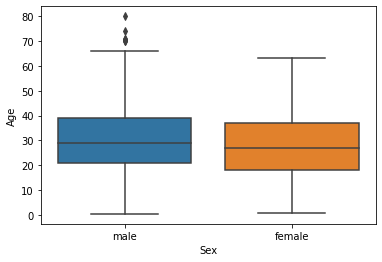

In [78]:
sns.boxplot(y = df['Age'], x = df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

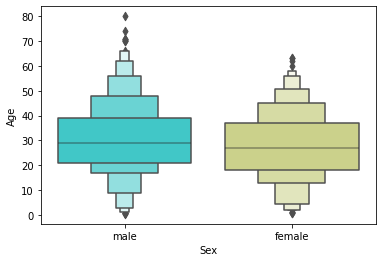

In [94]:
sns.boxenplot(x='Sex', y='Age', data=df, palette='rainbow')

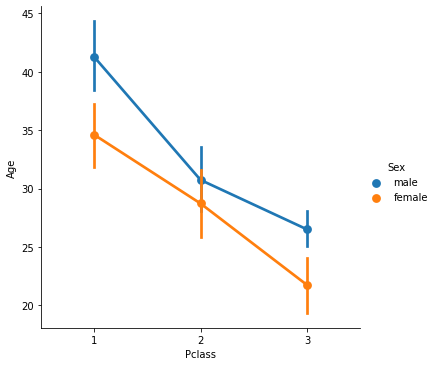

In [92]:
sns.catplot(x = "Pclass", y = "Age", data=df, hue="Sex",  kind="point")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

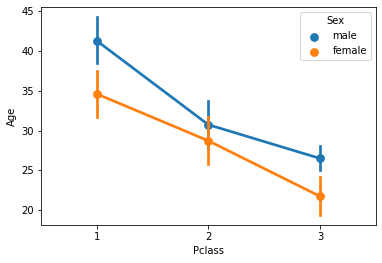

In [95]:
sns.pointplot(x = "Pclass", y = "Age", data=df, hue="Sex")

#### Categorical Vs. Categorical

<AxesSubplot:xlabel='Pclass', ylabel='count'>

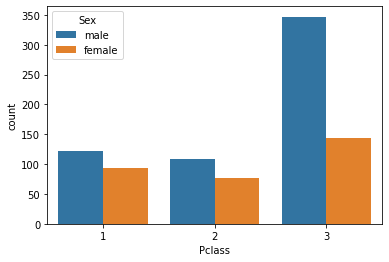

In [104]:
sns.countplot(x="Pclass",  hue="Sex", data=df)

<AxesSubplot:xlabel='Pclass'>

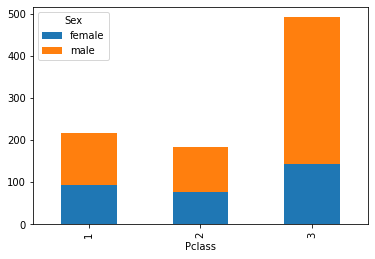

In [111]:
df.groupby(['Pclass', 'Sex']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Pclass'>

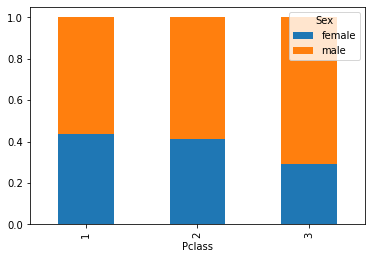

In [121]:
(df.groupby(['Pclass', 'Sex']).size()/df.groupby(['Pclass']).size()).unstack().plot(kind='bar', stacked=True)

#### Other Charts

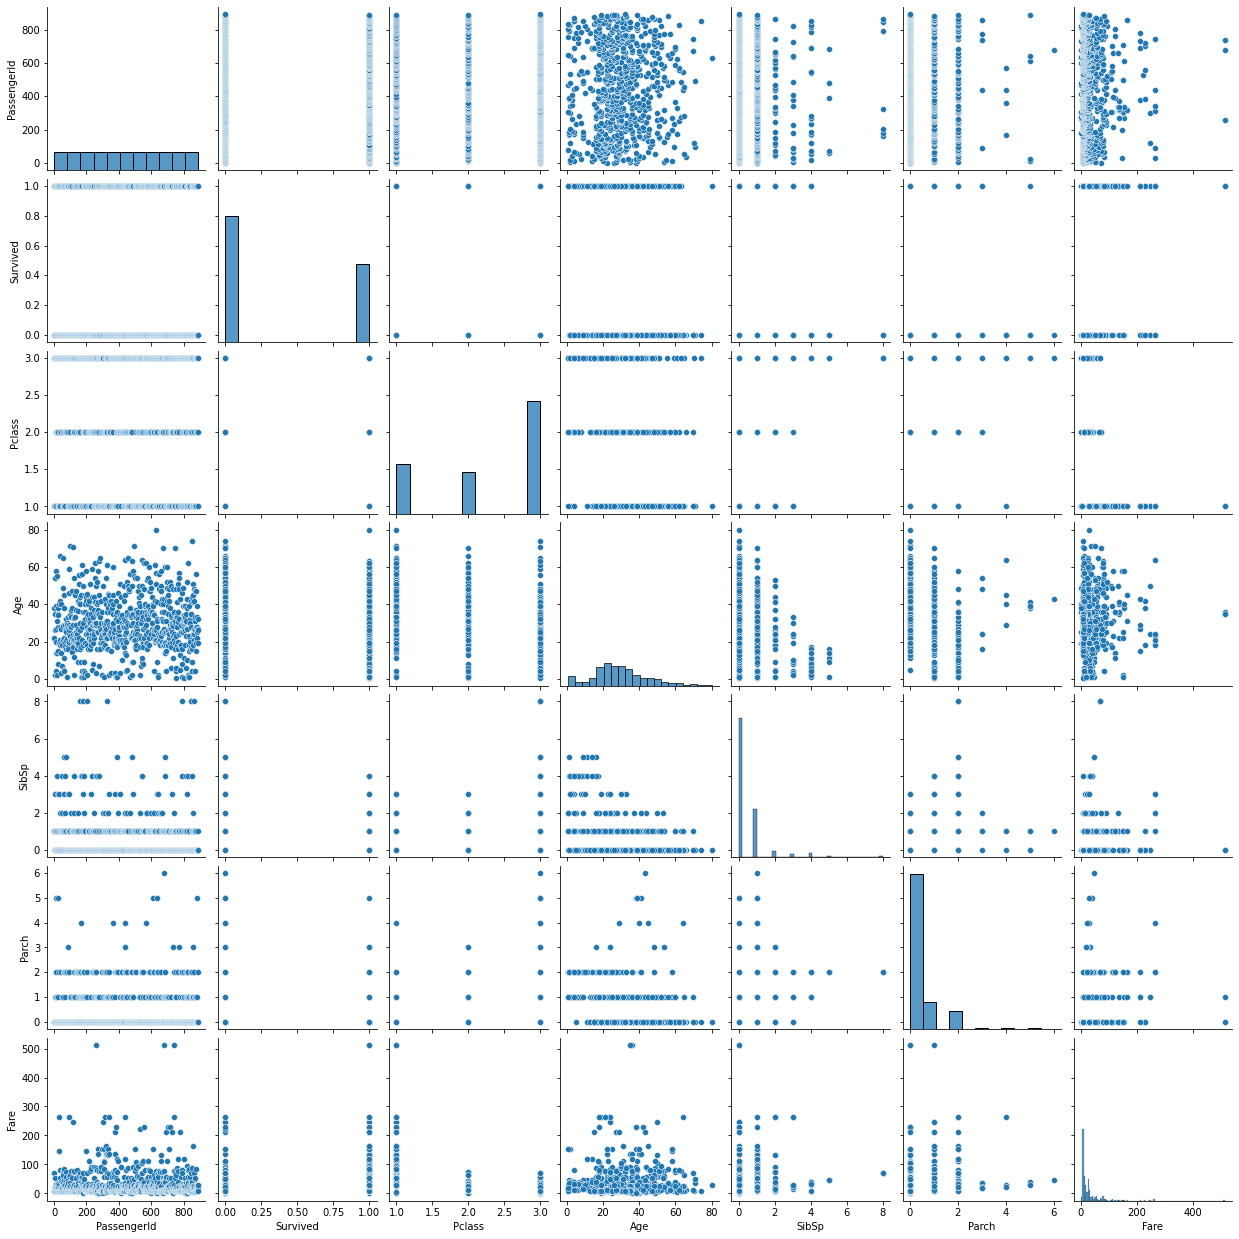

In [12]:
sns.pairplot(df)

<AxesSubplot:>

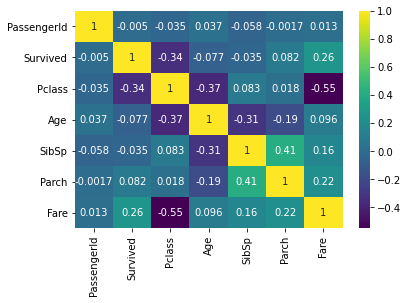

In [22]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:>

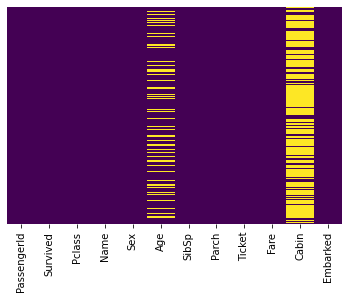

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

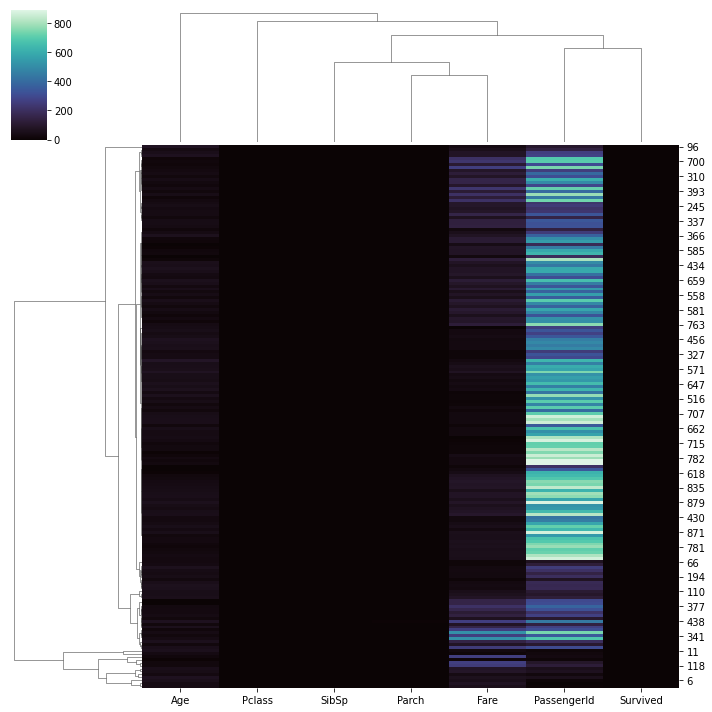

In [34]:
sns.clustermap(df.dropna().select_dtypes(include=np.number),metric='correlation',cmap='mako')

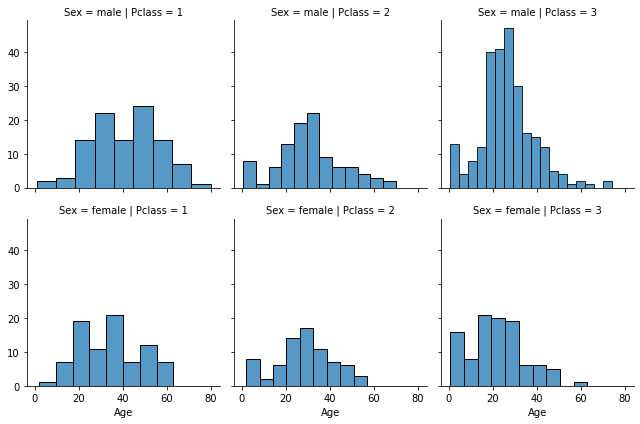

In [40]:
sns.FacetGrid(df, col = 'Pclass', row = 'Sex').map(sns.histplot, 'Age')

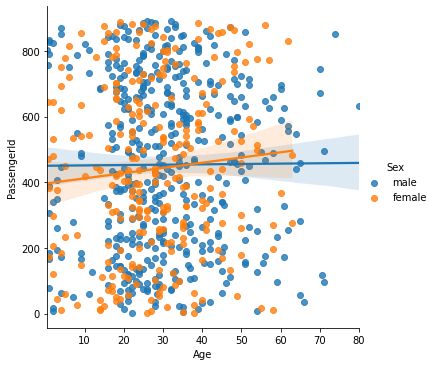

In [42]:
sns.lmplot(x = 'Age', y = 'PassengerId', data = df, hue = 'Sex')

##### Combining multiple plots

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

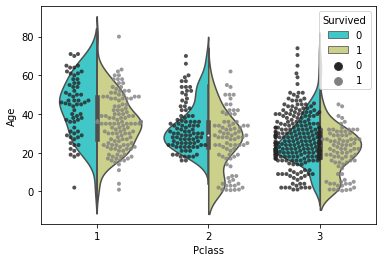

In [98]:
sns.violinplot(x='Pclass',y="Age", data=df, hue='Survived', split='True', palette='rainbow')
sns.swarmplot(x='Pclass',y="Age", data=df, hue='Survived', dodge='True', color='grey', alpha=.8, s=4)